## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [3]:
print('Есть ли в датасете пропуски?', "Да" if np.any(X.isna().values) else "Нет")
print('Есть ли в датасете категориальные признаки?', "Нет" if (X.select_dtypes(include=['object']).columns).empty else "Да")

# В наборе данных нет пропущенных значений, а также отсутствуют категориальные переменные.
# Следовательно, удалять никакие пропуски не нужно и использовать OneHot-кодирование тоже нет необходимости.

Есть ли в датасете пропуски? Нет
Есть ли в датасете категориальные признаки? Нет


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=np.random.seed(778), test_size=0.3, stratify=y)

# Используем функцию train_test_split() для разбиения выборки на тренировочную и тестовую.
# Задаем аргумент stratify, чтобы отношение данных разных классов в подвыборках было одинаковым,
# это позволяет сохранить баланс классов, что улучшает качество модели из-за более надежного и точного результата обучения.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [6]:
X_part = X[['alcohol','magnesium']]
X_part = StandardScaler().fit_transform(X_part)
X_train, X_test, y_train, y_test = train_test_split(X_part, y, random_state=np.random.seed(778), test_size = 0.3, stratify=y)
k_values = [1, 3, 5, 10, 15, 25]
classifiers = []

print("NN", 3*' ', "Train", 3*' ', "Test")
for k in k_values:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(X_train, y_train)
  classifiers.append(classifier)

  y_predicted_train = classifier.predict(X_train)
  y_predicted_test = classifier.predict(X_test)

  val_accuracy_train = np.round(accuracy_score(y_train, y_predicted_train), 2)
  val_accuracy_test = np.round(accuracy_score(y_test, y_predicted_test), 2)

  print(k, (5-len(str(k)))*' ', val_accuracy_train, (4 if len(str(val_accuracy_train)) == 4 else 5)*' ', val_accuracy_test)

# Выбираем только два признака 'alcohol' и 'magnesium' для обучения. Используем 'StandardScaler' для масштабирования признаков.
# Разбиваем выборку на обучающую и тестовую. Обучаем модель с конкретным числом соседей 'k', после чего находит долю верных ответов.

NN     Train     Test
1      1.0       0.69
3      0.84      0.7
5      0.79      0.76
10     0.77      0.72
15     0.73      0.74
25     0.71      0.72


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [7]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [8]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

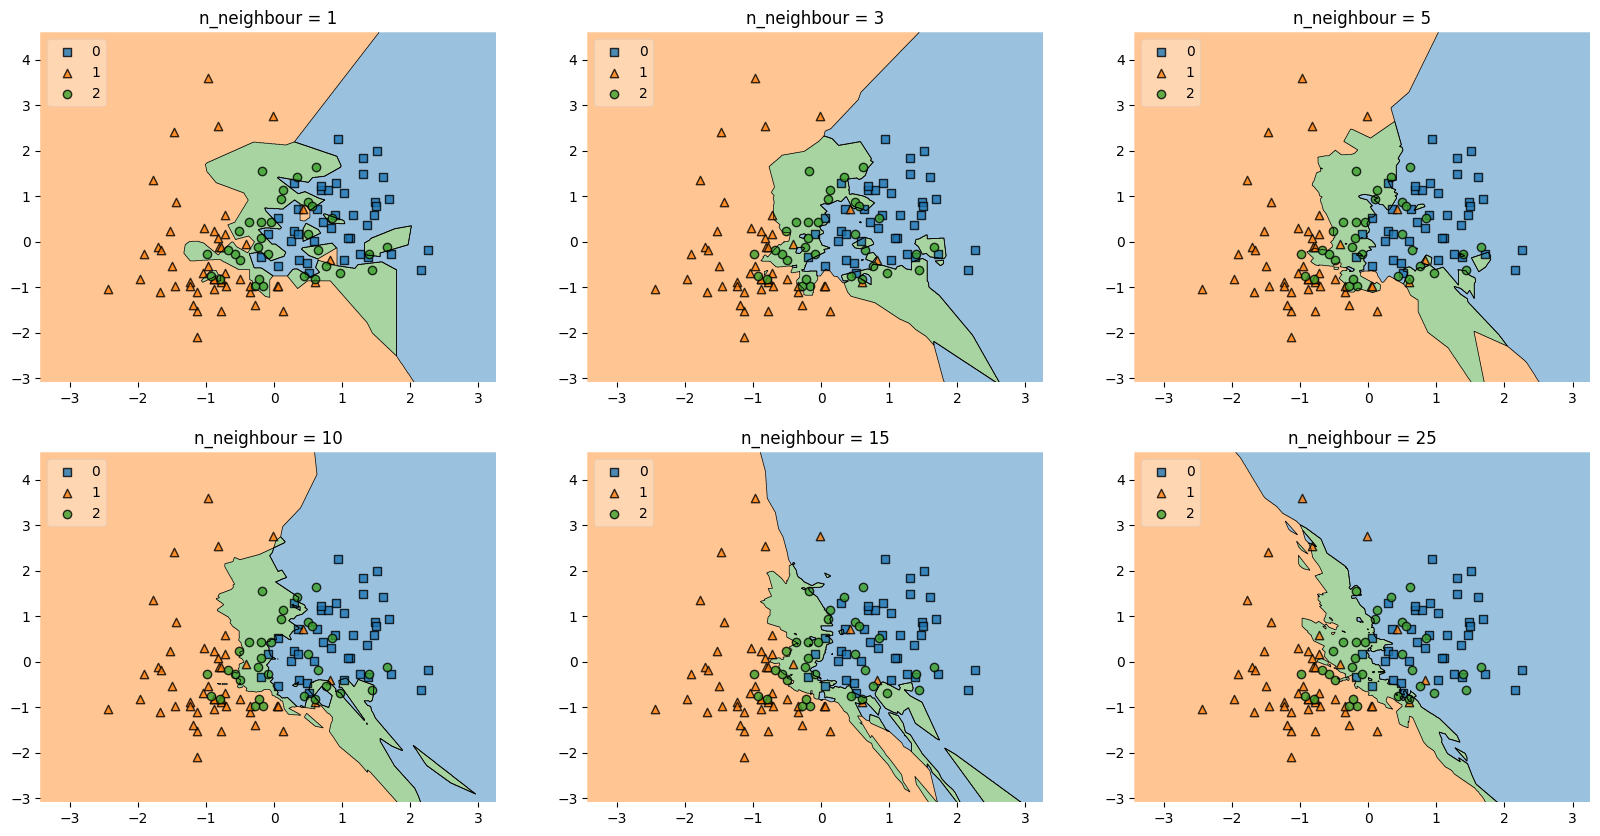

In [9]:
gs = gridspec.GridSpec(nrows=2, ncols=3)
fig = plt.figure(figsize=(20, 10))
labels = ['n_neighbour = 1', 'n_neighbour = 3', 'n_neighbour = 5', 'n_neighbour = 10', 'n_neighbour = 15', 'n_neighbour = 25']

for clf, lab, grd in zip(classifiers, labels, itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X_train), y=np.array(y_train), clf=clf, legend=2)
    plt.title(lab)

plt.show()

# Выбираем количество строк под графики равное 2, а количество столбцов - 3. Устанавливаем размер графиков и их заголовки.
# Отрисовываем графики в нужных местах, используя для их построения plot_decision_regions.

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

In [10]:
# Для обучения классификатора наиболее оптимальным оказалось число соседей k = 5, так как значение доли правильных ответов на тестовой выборке оказалось максимальным
# из всех возможных ответов(accuracy_test_max = 0.76, k = 5).
# При малых k решающая поверхность слишком неоднородная, ее тяжело разбить на части, так как она слишком подвержена выбросам.
# При средних k решающая поверхность становится более ровной, а вот при самых больших значениях k структура становится более четкой.
# При k = 1 и k = 3 модель переобучилась, так как значения доли правильных ответов на обучающей и тестовой выборке отличаются довольно сильно.
# При k = 1: 1.00 - 0.69 = 0.31 и при k = 3: 0.84 - 0.7 = 0.14.
# Это возникает, так как при слишком малом числе соседей в KNN модель слишком подстраивается под любые детали, что приводит к слабой обобщающей способности на новых данных.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

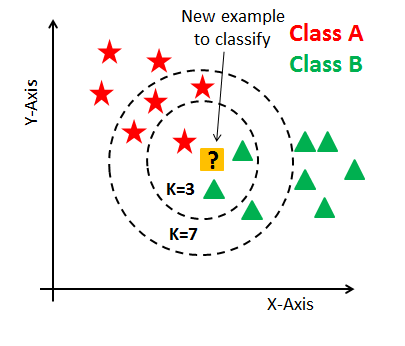

In [68]:
import numpy as np
import scipy
from collections import Counter
from scipy.stats import mode

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y
      # Запоминаем обучающую выборку

    def predict(self, X):
      X_test = X
      y_pred = np.zeros(X_test.shape[0])
      # Создаем массив с предсказаниями для всех объектов тестовой выборки
      for i in range(X_test.shape[0]):
        cur_val = X_test[i]
        # Выбираем очередной объект тестовой выборки
        sorted_classes = np.zeros(self.k)
        # Создаем массив, где по итогу будут лежать классы ближайших объектов
        dist = np.zeros(self.X_train.shape[0])
        # Создаем массив расстояний до всех объектов обучающей выборки
        dist = self.count_distance(cur_val, self.X_train)
        # Для всех объектов обучающей выборки находим расстояние до текущего объекта тестовой выборки
        sorted_classes = self.y_train[dist.argsort()][:self.k]
        # Сортируем объекты обучающей выборке по близости к текущему объекту тестовой выборки и выбираем k первых из них
        y_pred[i] = mode(sorted_classes)[0]
        # Сохраняем ответ для текущего объекта тестовой выборки
      return y_pred

    def count_distance(self, x, y):
      return np.sqrt(np.sum(np.square(x - y), axis=1))
      # Вычисляем Евклидово расстояние



In [58]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [69]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

# Все тесты пройдены

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [14]:
!wget -P data https://github.com/PiginIvan/Archives/raw/main/archive1.zip
!unzip /content/data/archive1.zip -d data

--2024-03-20 15:02:46--  https://github.com/PiginIvan/Archives/raw/main/archive1.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PiginIvan/Archives/main/archive1.zip [following]
--2024-03-20 15:02:46--  https://raw.githubusercontent.com/PiginIvan/Archives/main/archive1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 750893 (733K) [application/zip]
Saving to: ‘data/archive1.zip’

archive1.zip        100%[===================>] 733.29K  --.-KB/s    in 0.04s   

2024-03-20 15:02:46 (16.2 MB/s) - ‘data/archive1.zip’ saved [750893/750893]

Archive:  /content/data/archive1.zip
  inflating: data

In [15]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [16]:
print('Есть ли в датасете пропуски?', "Да" if np.any(data.isna().values) else "Нет")
data = data.drop('Unnamed: 0', axis=1)

# В датасете нет пропусков.
# Бессмысленный столбец - самый первый, который просто отвечает за индексацию элементов в датасете. Его можно удалить.

Есть ли в датасете пропуски? Нет


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [17]:
target = 'price'
pd.DataFrame(data[data.columns[data.dtypes == 'float64'].append(pd.Index([target]))].corr())

# Такие признаки как carat, x, y, z коррелируют с price больше всего

,carat,depth,table,x,y,z,price
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387,0.921591
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924,-0.010647
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929,0.127134
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772,0.884435
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006,0.865421
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000,0.861249
price,0.921591,-0.010647,0.127134,0.884435,0.865421,0.861249,1.000000


**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
categorical_features = np.array(data.columns[data.dtypes == 'object'])
encoding = pd.DataFrame(OneHotEncoder().fit_transform(data[categorical_features]).toarray())
data_encoded = data.join(encoding)
data_encoded = data_encoded.drop(categorical_features, axis=1)
data_encoded.head(5)

# Выбираем категориальные признаки, кодируем их с помощью OneHot-encoding и присоединяем к dataframe

,carat,depth,table,price,x,y,z,0,1,2,...,10,11,12,13,14,15,16,17,18,19
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [23]:
y = data_encoded[target]
X = data_encoded.drop('price', axis=1)

bins = np.linspace(0, 2758, 50)
y_binned = np.digitize(y, bins)

X_train_diam, X_test_diam, y_train_diam, y_test_diam = train_test_split(X, y, random_state=np.random.seed(778), test_size=0.3, stratify=y_binned)
X_train_diam.head(5)

# Используем функцию train_test_split() для разбиения выборки на тренировочную и тестовую.
# Задаем аргумент stratify, предварительно разбив ответ на бины, чтобы отношение данных разных классов в подвыборках было одинаковым,
# это позволяет сохранить баланс классов, что улучшает качество модели из-за более надежного и точного результата обучения.

,carat,depth,table,x,y,z,0,1,2,3,...,10,11,12,13,14,15,16,17,18,19
14275,1.20,60.4,58.0,6.95,6.89,4.18,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50274,0.70,61.9,58.0,5.63,5.67,3.50,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2155,0.71,61.1,57.0,5.75,5.77,3.52,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25407,2.00,59.8,60.0,8.04,8.01,4.80,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49442,0.70,62.1,55.0,5.69,5.72,3.54,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [24]:
float_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

X_train_diam_part = X_train_diam.drop(float_features, axis=1)
X_train_diam_float_features = X_train_diam[float_features]
X_train_diam1 = StandardScaler().fit_transform(X_train_diam_float_features)
X_train_final = pd.DataFrame(np.concatenate((X_train_diam1, X_train_diam_part), axis=1))

X_test_diam_part = X_test_diam.drop(float_features, axis=1)
X_test_diam_float_features = X_test_diam[float_features]
X_test_diam1 = StandardScaler().fit_transform(X_test_diam_float_features)
X_test_final = pd.DataFrame(np.concatenate((X_test_diam1, X_test_diam_part), axis=1))

X_train_final.head(5)

# Выбираем и масштабируем вещественные признаки с помощью StandardScaler. Присоединяем отмасштабированные столбцы к dataframe.

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.843246,-0.936372,0.242015,1.083790,1.005288,0.900793,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.207861,0.107550,0.242015,-0.092229,-0.058197,-0.056606,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.186838,-0.449209,-0.206432,0.014681,0.028974,-0.028447,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2.525015,-1.353941,1.138908,2.054897,1.981603,1.773715,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.207861,0.246739,-1.103325,-0.038774,-0.014612,-0.000288,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
linreg = LinearRegression().fit(X_train_final, y_train_diam)

MSE_train = np.round(mean_squared_error(y_train_diam, linreg.predict(X_train_final)), 2)
MSE_test = np.round(mean_squared_error(y_test_diam, linreg.predict(X_test_final)), 2)

print(f"Среднеквадратичная ошибка на обучающей выборке равна: {MSE_train}")
print(f"Среднеквадратичная ошибка на тестовой выборке равна: {MSE_test}")

# Обучаем линейную регрессию и выводим среднеквадратичную ошибку на тренировочной и тестовой выборках.

Среднеквадратичная ошибка на обучающей выборке равна: 1281392.92
Среднеквадратичная ошибка на тестовой выборке равна: 1266975.34


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [29]:
lr_coefs = pd.DataFrame(linreg.coef_).rename(columns = {0 : 'LinearRegression'})
lr_coefs

# Значения в строках под номерами 1 и 3 по модулю на порядок превышают оценки прочих вещественных переменных.
# Эти строки соответствуют таким признакам как: carat и x.

,LinearRegression
0,5364.606925
1,-90.763258
2,-53.739433
3,-1155.514400
4,17.818762
5,-38.437562
6,-576.855300
7,-6.541396
8,260.727699
9,185.934695


**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [30]:
from sklearn.linear_model import Lasso, Ridge

In [42]:
hyperparameter = 10
ls = Lasso(hyperparameter).fit(X_train_final, y_train_diam)
print("Lasso:")
MSE_ls_train = np.round(mean_squared_error(y_train_diam, ls.predict(X_train_final)), 2)
MSE_ls_test = np.round(mean_squared_error(y_test_diam, ls.predict(X_test_final)), 2)

print(f"Среднеквадратичная ошибка на обучающей выборке равна: {MSE_ls_train}")
print(f"Среднеквадратичная ошибка на тестовой выборке равна: {MSE_ls_test}")

rd = Ridge(hyperparameter).fit(X_train_final, y_train_diam)
print("Ridge:")
MSE_rd_train = np.round(mean_squared_error(y_train_diam, rd.predict(X_train_final)), 2)
MSE_rd_test = np.round(mean_squared_error(y_test_diam, rd.predict(X_test_final)), 2)
print(f"Среднеквадратичная ошибка на обучающей выборке равна: {MSE_rd_train}")
print(f"Среднеквадратичная ошибка на тестовой выборке равна: {MSE_rd_test}")

# Обучаем Lasso-регрессию и Ridge-регрессию и выводим среднеквадратичную ошибку на тренировочной и тестовой выборках.

Lasso:
Среднеквадратичная ошибка на обучающей выборке равна: 1318930.48
Среднеквадратичная ошибка на тестовой выборке равна: 1301988.9
Ridge:
Среднеквадратичная ошибка на обучающей выборке равна: 1281559.69
Среднеквадратичная ошибка на тестовой выборке равна: 1266646.05


In [44]:
ls_coefs = pd.DataFrame(ls.coef_).rename(columns = {0 : 'Lasso'})
rd_coefs = pd.DataFrame(rd.coef_).rename(columns = {0 : 'Ridge'})
ls_and_rd_coefs = pd.concat([ls_coefs, rd_coefs], axis=1)
ls_and_rd_coefs

# Веса некоторых признаков уменьшились, однако не на слишком большое значение, но значит в первоначальной регрессии присутствовал эффект мультиколлинеарности.
# Кроме того, как мы можем судить по матрице корреляций в 3.2 на данной выборке действительно присутствует проблема мультиколлинеарности.
# Это может приводить к тому, осложняется интерпретация параметров регрессии, они теряют смысл и следует рассматривать другие переменные.
# А также получаются большие стандартные ошибки, в связи с ненадежной оценкой параметров.

,Lasso,Ridge
0,4864.101202,5322.832457
1,-100.124267,-89.206142
2,-73.153559,-54.144877
3,-710.074518,-1110.420432
4,-0.000000,14.475051
5,-39.205311,-42.151238
6,-433.864063,-579.882402
7,-39.173733,-6.385271
8,95.933243,261.736696
9,0.000000,186.216022


**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.305e+07, tolerance: 6.032e+07
  model = cd_fast.enet_coordinate_descent(


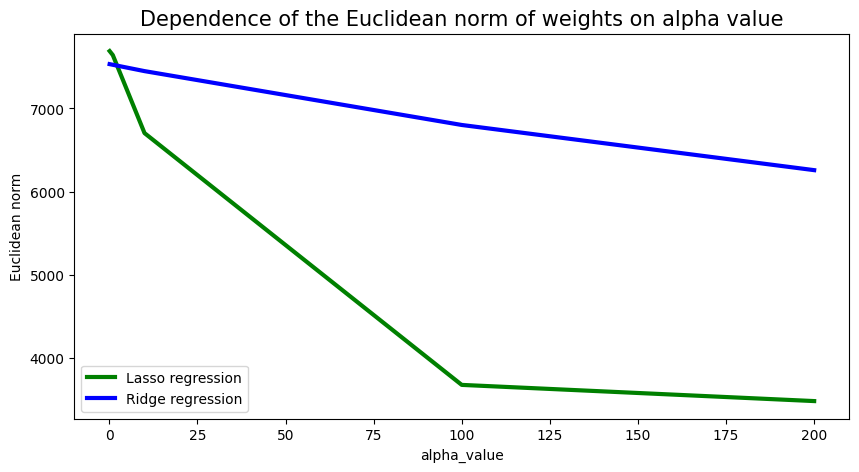

In [39]:
alpha_values = [0.1, 1, 10, 100, 200]
Euclidean_ls_norm, Euclidean_rd_norm = [], []

for alpha in alpha_values:
    ls = Lasso(alpha).fit(X_train_final, y_train_diam)
    rd = Ridge(alpha).fit(X_train_final, y_train_diam)
    ls_coefs_normed = np.linalg.norm(ls.coef_)
    rd_coefs_normed = np.linalg.norm(rd.coef_)
    Euclidean_ls_norm.append(ls_coefs_normed)
    Euclidean_rd_norm.append(rd_coefs_normed)

plt.figure(figsize=(10, 5))
plt.plot(alpha_values, Euclidean_ls_norm, label='Lasso regression', color='green', linewidth=3)
plt.plot(alpha_values, Euclidean_rd_norm, label='Ridge regression', color='blue', linewidth=3)
plt.xlabel('alpha_value', fontsize=10)
plt.ylabel('Euclidean norm', fontsize=10)
plt.title('Dependence of the Euclidean norm of weights on alpha value', fontsize = 15)
plt.legend(loc='lower left')

# Обучаем Lasso- и Ridge-регрессии с разными значениями alpha и строим график зависимости евклидовой нормы весов от параметра alpha.
# Lasso-регрессия агрессивнее уменьшает веса.Её чаще используют для отбора признаков, так как веса могут оказаться достаточно большими по модулю.
# Lasso-регрессия сильно "штрафует" модель за слишком большие веса, чтобы убрать эффект переобучения.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [45]:
from sklearn.linear_model import LassoCV

In [46]:
ls_cross_validation = LassoCV(alphas=alpha_values, cv=5).fit(X_train_final, y_train_diam)
pd.DataFrame(ls_cross_validation.alphas_).rename(columns = {0 : 'Alpha value'})

# Выводим порядок alpha значений

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126472797.3125534, tolerance: 48908815.57238264
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9349575827.722408, tolerance: 48908815.57238264
  model = cd_fast.enet_coordinate_descent_gram(


,Alpha value
0,200.0
1,100.0
2,10.0
3,1.0
4,0.1


In [48]:
MSE_values = ls_cross_validation.mse_path_
alpha_best, min_mean_MSE = -1, 10e9
for i in range(len(MSE_values) - 1, -1, -1):
    cur_mean_MSE = np.mean(MSE_values[i])
    print(f'Усреднённое MSE для альфа = {alpha_values[len(MSE_values) - i - 1]}: {cur_mean_MSE}')
    if((cur_mean_MSE) < min_mean_MSE):
      min_mean_MSE = cur_mean_MSE
      alpha_best = len(MSE_values) - i - 1

print(f"\nНаилучшее значение альфа: {alpha_best}")

# Находим усредненное MSE для каждого из перечисленных выше значений alpha и выбираем лучшее, на котором ошибка минимальна.
# Оптимальное значение alpha оказалось равным 1.

Усреднённое MSE для альфа = 0.1: 1343350.8914032956
Усреднённое MSE для альфа = 1: 1288706.969428378
Усреднённое MSE для альфа = 10: 1322131.5589364541
Усреднённое MSE для альфа = 100: 2239489.5038367882
Усреднённое MSE для альфа = 200: 2439480.9579399726

Наилучшее значение альфа: 1


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [50]:
ls_with_alpha = Lasso(alpha_best).fit(X_train_final, y_train_diam)
pd.DataFrame(ls_with_alpha.coef_).rename(columns = {0 : 'Lasso coefs'})

# Обучаем Lasso-регрессию с оптимальным значением alpha и выводим коэффициенты.
# Неинформативными можно считать те признаки, которые имеют слишком малые веса.
# Из вещественных признаков это 'y'.
# Наиболее информативные - те, кто получили большие веса при оценке.
# Из вещественных это 'carat' и 'x', а также некоторые категориальные признаки.
# Это могло произойти, так как мы выбрали оптимальное значение alpha с минимальной ошибкой,
# из-за чего модель сильно подстроилась под нее и появились слишком большие и слишком маленькие коэффициенты.

,Lasso coefs
0,5314.920230
1,-92.081230
2,-55.729367
3,-1097.237864
4,0.000000
5,-36.813870
6,-687.165314
7,-133.656834
8,120.250193
9,42.256054


**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [53]:
MSE_lasso_test = np.round(mean_squared_error(y_test_diam, ls_with_alpha.predict(X_test_final)), 2)
print(f"Среднеквадратичная ошибка на тестовой выборке равна: {MSE_lasso_test}")

# Находим среднеквадратичную ошибку на тестовой выборке обученной Lasso-регрессии.
# Значение ошибки у Lasso-регрессии оказалось чуть лучше. Её предпочтительнее использовать для предсказаний,
# так как она лучше штрафует за большие веса, что ведет к лучшей устойчиваости перед малыми изменениями и снижению шанса переобучения модели.

Среднеквадратичная ошибка на тестовой выборке равна: 1266968.99
